# Chapter 12: Spatial data management - raster formats

[*Rasterio*](https://rasterio.readthedocs.io/en/latest/) is a highly useful module for raster processing which you can use for reading and writing several raster formats in Python.

## How to install *rasterio*?

We need to install the `rasterio` package.

### Anaconda - Platform independent

If you have Anaconda installed, open the *Anaconda Prompt* and type in:
```
conda install -c conda-forge rasterio
```

### Python Package Installer (pip) - Linux

If you have standalone Python3 and Jupyter Notebook install on Linux, open a command prompt / terminal and type in:
```
pip3 install rasterio
```

### Python Package Installer (pip) - Windows

The installation of *rasterio* is much more complicated with *pip* on Windows, because it depends on the *GDAL* library, for which the binaries must be installed separately or compiled from source.
An easier approach is to install these packages from [Python binary wheel files](https://www.lfd.uci.edu/~gohlke/pythonlibs/).

Due to its complexity these options are only recommended for advanced Python users and it is **strongly advised to use Anaconda on Windows**.

## How to use *rasterio*?

The rasterio package is also a module which you can simply import.
```python
import rasterio
```

## Opening a dataset

The `open()` function takes a path string or path-like object and returns an opened dataset object.
The path may point to a file of any supported raster format.

The `data/LC08_L1TP_188027_20200420_20200508_01_T1_Szekesfehervar.tif` file is a segment of a Landsat 8 satellite image of Székesfehérvár city, Lake Velence and their surroundings, acquired on 2020 April 20.

In [1]:
import rasterio
szfv_2020 = rasterio.open('../data/LC08_L1TP_188027_20200420_20200508_01_T1_Szekesfehervar.tif')

Dataset objects have some attributes regarding the opened file:

In [2]:
print(szfv_2020.name)
print(szfv_2020.mode) # by default the file is opened in read mode
print(szfv_2020.closed) # will be True after closed() called

../data/LC08_L1TP_188027_20200420_20200508_01_T1_Szekesfehervar.tif
r
False


Properties of the raster data stored in the example GeoTIFF can be accessed through attributes of the opened dataset object.

In [3]:
print(szfv_2020.count) # band count
print(szfv_2020.width) # dimensions
print(szfv_2020.height)

11
1057
645


## Dataset georeferencing

A GIS raster dataset is different from an ordinary image; its elements (or “pixels”) are mapped to regions on the earth’s surface. All pixels of a dataset is contained within a spatial bounding box.

In [4]:
print(szfv_2020.bounds)

BoundingBox(left=296745.0, bottom=5221185.0, right=328455.0, top=5240535.0)


Our example covers the world from 296745 meters to 328455 meters left to right, and 5221185 meters to 5240535 meters bottom to top. Therefore, it covers a region 31.71 kilometers wide by 19.35 kilometers high.

The value of `bounds` attribute is derived from a more fundamental attribute: the dataset’s geospatial transform.

In [5]:
print(szfv_2020.transform)

| 30.00, 0.00, 296745.00|
| 0.00,-30.00, 5240535.00|
| 0.00, 0.00, 1.00|


A dataset’s `transform` is an affine transformation matrix that maps pixel locations in *(row, col)* coordinates to *(x, y)* spatial positions. The product of this matrix and `(0, 0)`, the row and column coordinates of the upper left corner of the dataset, is the spatial position of the upper left corner.

In [6]:
print(szfv_2020.transform * (0, 0))

(296745.0, 5240535.0)


The position of the lower right corner is obtained similarly.

In [7]:
print(szfv_2020.transform * (szfv_2020.width, szfv_2020.height))

(328455.0, 5221185.0)


But what do these numbers mean? 296745 meters from where? These coordinate values are relative to the origin of the dataset’s coordinate reference system (CRS).

In [8]:
print(szfv_2020.crs)

EPSG:32634


All metadata for the whole raster dataset can be displayed easily if desired:

In [9]:
print(szfv_2020.meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1057, 'height': 645, 'count': 11, 'crs': CRS.from_epsg(32634), 'transform': Affine(30.0, 0.0, 296745.0,
       0.0, -30.0, 5240535.0)}


## Reading raster data

Data from a raster band can be accessed by the band’s index number. Following the [GDAL](https://gdal.org/) convention (on which library Rasterio depends on), bands are indexed from 1.

In [10]:
print(szfv_2020.indexes)

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)


Landsat 8 satellite images contain 11 bands, in the following order:

| Band Number | Description               | Wavelength        | Resolution |
|-------------|---------------------------|-------------------|------------|
| Band 1      | Coastal / Aerosol         | 0.433 to 0.453 µm | 30 meter   |
| Band 2      | Visible blue              | 0.450 to 0.515 µm | 30 meter   |
| Band 3      | Visible green             | 0.525 to 0.600 µm | 30 meter   |
| Band 4      | Visible red               | 0.630 to 0.680 µm | 30 meter   |
| Band 5      | Near-infrared             | 0.845 to 0.885 µm | 30 meter   |
| Band 6      | Short wavelength infrared | 1.56 to 1.66 µm   | 30 meter   |
| Band 7      | Short wavelength infrared | 2.10 to 2.30 µm   | 60 meter   |
| Band 8      | Panchromatic              | 0.50 to 0.68 µm   | 15 meter   |
| Band 9      | Cirrus                    | 1.36 to 1.39 µm   | 30 meter   |
| Band 10     | Long wavelength infrared  | 10.3 to 11.3 µm   | 100 meter  |
| Band 11     | Long wavelength infrared  | 11.5 to 12.5 µm   | 100 meter  |

We can read the bands of a dataset with the `read()` method:

In [11]:
red = szfv_2020.read(4)
green = szfv_2020.read(3)
blue = szfv_2020.read(2)

Bands are simply 2D mathematical matrices stored as multi-dimensional *NumPy* arrays. [*NumPy*](https://numpy.org/) is a first-rate library for numerical programming. It is widely used in academia, finance and also in the industry.

Not only *Rasterio*, but the already introduced *Pandas* library (see [Chapter 9](09_tabular.ipynb)) is also built on top of *NumPy*, providing high-performance, easy-to-use data structures and data analysis tools, making data manipulation and visualization more convenient.

In [12]:
print(type(red))
print(red)

<class 'numpy.ndarray'>
[[10341 11341 11207 ...  9396 10034  9787]
 [10870  9897  8611 ...  9519  9783 10904]
 [ 9462  8245  7742 ...  9874  9893 10182]
 ...
 [ 8764  9336  9138 ...  9509  9379  9034]
 [ 7363  8361  9568 ... 10178 10898  8784]
 [ 7153  7760  9294 ...  9827 10491  8794]]


For a *NumPy* array we can easily get the range and the mean of the values:

In [13]:
print(red.min())
print(red.max())
print(red.mean())

6304
55987
8493.439567886295


Values from the array can be addressed by their row, column index.

In [14]:
print(red[500, 500]) # random position

10245


## Plotting

Since *Rasterio* reads raster data into mathematical matrices (*numpy arrays*), plotting a single band as two-dimensional data can be accomplished directly with *matplotlib*, as it also strongly depends on *NumPy*. For detailed information on Numpy, see [Appendix 2](AX02_math.ipynb).

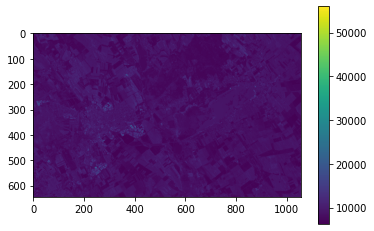

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(red)
plt.colorbar()
plt.show()

In our case the data is not evenly distributed in the range $[0, 65535]$, most values are below 16000. The maximum and minimum value for visualization can be overridden with the `vmax` and `vmin` parameters.

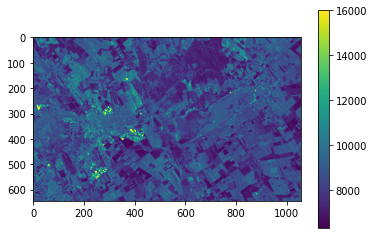

In [16]:
plt.imshow(red, vmax=16000)
plt.colorbar()
plt.show()

Instead of using a static value (16000), calculate the 99.9% percentile of each bands to remove only the few outliers (0.1%) from visualization.

In [17]:
import numpy as np

red_max = np.percentile(red, 99.9)
blue_max = np.percentile(blue, 99.9)
green_max = np.percentile(green, 99.9)
print(red_max)
print(blue_max)
print(green_max)

16310.472000000067
14844.236000000034
15248.0


*Remark:* here we use the numpy package directly to calculate the 99.9% percentile. NumPy is a module which can be imported as usual and is aliased with the `np` abbreviation in most cases.

The `vmax` parameter can be defined as a dynamic value for the now:

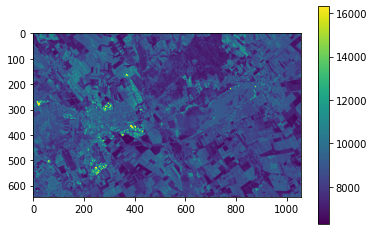

In [18]:
plt.imshow(red, vmax=red_max)
plt.colorbar()
plt.show()

Color maps can also be used with the `cmap` parameter (*see [Chapter 11](11_spatial_vector.ipynb) for more details*).

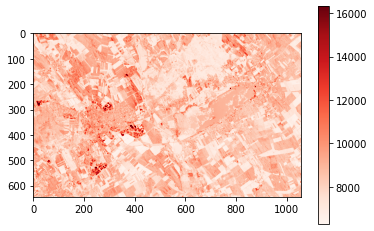

In [19]:
plt.imshow(red, vmax=red_max, cmap='Reds')
plt.colorbar()
plt.show()

## Histogram

Create a histogram of the visible bands of the Landsat satellite image.

First, create a pandas *DataFrame* from the 3 bands. The *DataFrame* shall contain 3 *Series*: one for each band. The *DataFrame* shall contain as many rows as many pixels are in the image.
To achieve this we *flatten* the 2D matrices into 1D vectors. (For *NumPy* both of them are arrays, regardless of their dimensions.)

In [20]:
print("2D array:")
print(red)
print("Type: {0}, Size: {1}".format(type(red), red.size))
print()
print("1D array:")
red_vector = red.flatten()
print(red_vector)
print("Type: {0}, Size: {1}".format(type(red), red.size))

2D array:
[[10341 11341 11207 ...  9396 10034  9787]
 [10870  9897  8611 ...  9519  9783 10904]
 [ 9462  8245  7742 ...  9874  9893 10182]
 ...
 [ 8764  9336  9138 ...  9509  9379  9034]
 [ 7363  8361  9568 ... 10178 10898  8784]
 [ 7153  7760  9294 ...  9827 10491  8794]]
Type: <class 'numpy.ndarray'>, Size: 681765

1D array:
[10341 11341 11207 ...  9827 10491  8794]
Type: <class 'numpy.ndarray'>, Size: 681765


In [21]:
import pandas as pd

szfv_df = pd.DataFrame({
    'red': red.flatten(),    
    'blue': blue.flatten(),    
    'green': green.flatten()
})
display(szfv_df)
display(szfv_df.iloc[100000]) # random row

red   blue  green
0       10341  10086  10072
1       11341  10607  10728
2       11207  10433  10688
3        8566   9440   9005
4        7705   8955   8736
...       ...    ...    ...
681760   8517   9096   8383
681761   8338   9026   8247
681762   9827   9842   9359
681763  10491  10163   9789
681764   8794   9314   8599

[681765 rows x 3 columns]

red      7363
blue     8577
green    8090
Name: 100000, dtype: uint16

Now we can create the histograms for the *Series* (or for the *DataFrame* to display it on a single plot), as we have learned it in [Chapter 10](10_plotting.ipynb).

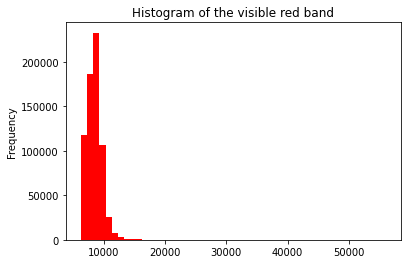

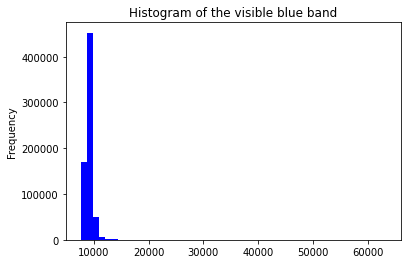

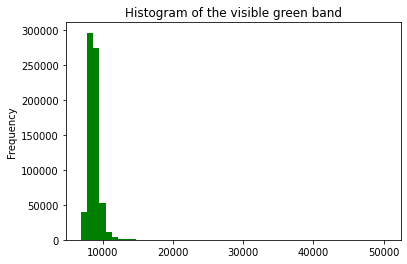

In [22]:
szfv_df['red'].plot(kind='hist', bins=50, color='red', title='Histogram of the visible red band')
plt.show()
szfv_df['blue'].plot(kind='hist', bins=50, color='blue', title='Histogram of the visible blue band')
plt.show()
szfv_df['green'].plot(kind='hist', bins=50, color='green', title='Histogram of the visible green band')
plt.show()

This visually verifies our previous conclusion that most values for the visible colour bands are below 16000.

Get the histogram of the "interesting" part:

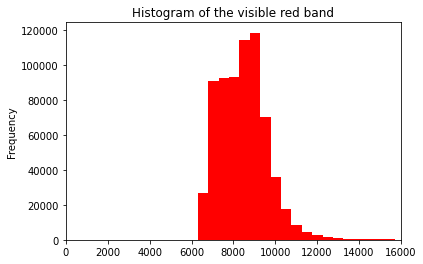

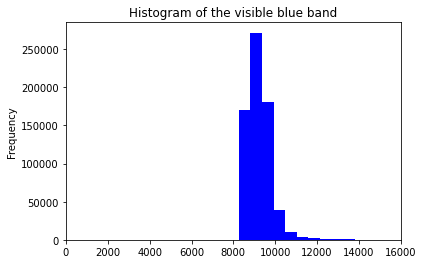

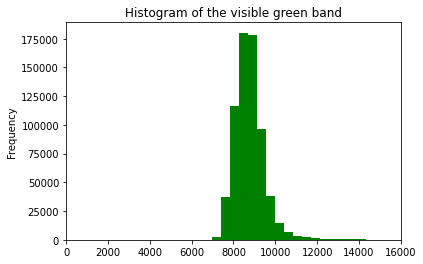

In [23]:
szfv_df['red'].plot(kind='hist', bins=100, xlim=(0, 16000), color='red', title='Histogram of the visible red band')
plt.show()
szfv_df['blue'].plot(kind='hist', bins=100, xlim=(0, 16000), color='blue', title='Histogram of the visible blue band')
plt.show()
szfv_df['green'].plot(kind='hist', bins=100, xlim=(0, 16000), color='green', title='Histogram of the visible green band')
plt.show()

### Multi-band plotting

Rasterio also provides `rasterio.plot.show()` to perform common tasks such as displaying multi-band images as RGB and labeling the axes with proper geo-referenced extents.

It can be used for a single band:

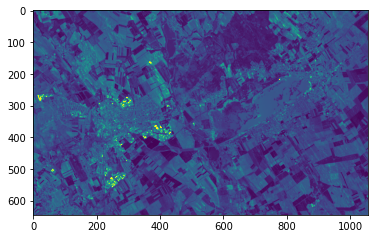

In [24]:
from rasterio.plot import show

show(red, vmax=red_max)
plt.show()

For multiple bands to visualize in a true-color image, the values must be in the range of $[0, 255]$ or in the float range of $[0, 1]$.

In [25]:
# astype('f4') is a numpy function to convert to float (4 byte)
redf = red.astype('f4') / red_max
bluef = blue.astype('f4') / blue_max
greenf = green.astype('f4') / green_max
rgb = [redf, greenf, bluef]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


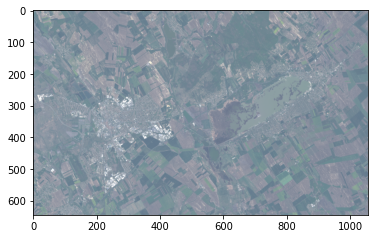

In [26]:
show(rgb)
plt.show()

Increase the figure size:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


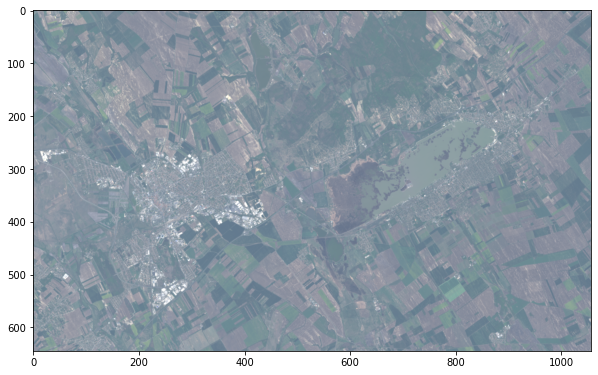

In [27]:
plt.figure(figsize=[10,10])
show(rgb)
plt.show()

---

## Example computation: NDVI

The [Normalized Difference Vegetation Index](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) is a simple indicator that can be used to assess whether the target includes healthy vegetation. This calculation uses two bands of a multispectral image dataset, the Red and Near-Infrared (NIR) bands.

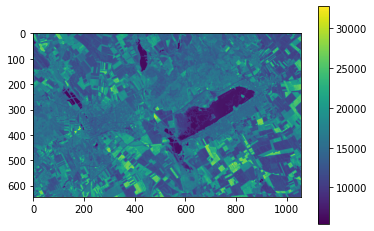

In [28]:
nir = szfv_2020.read(5)
plt.imshow(nir, vmax=2**15)
plt.colorbar()
plt.show()

In [29]:
nir_max = np.percentile(nir, 99.9)
print(nir_max)
nirf = nir.astype('f4') / nir_max

28102.0


The value of *NDVI* can be calculated with a simple mathematical formula:

$$NDVI = \frac{NIR - Red}{NIR + Red}$$

With Rasterio we can perform the computation on the bands themselves, which will apply the computation to each pixel-pairs.

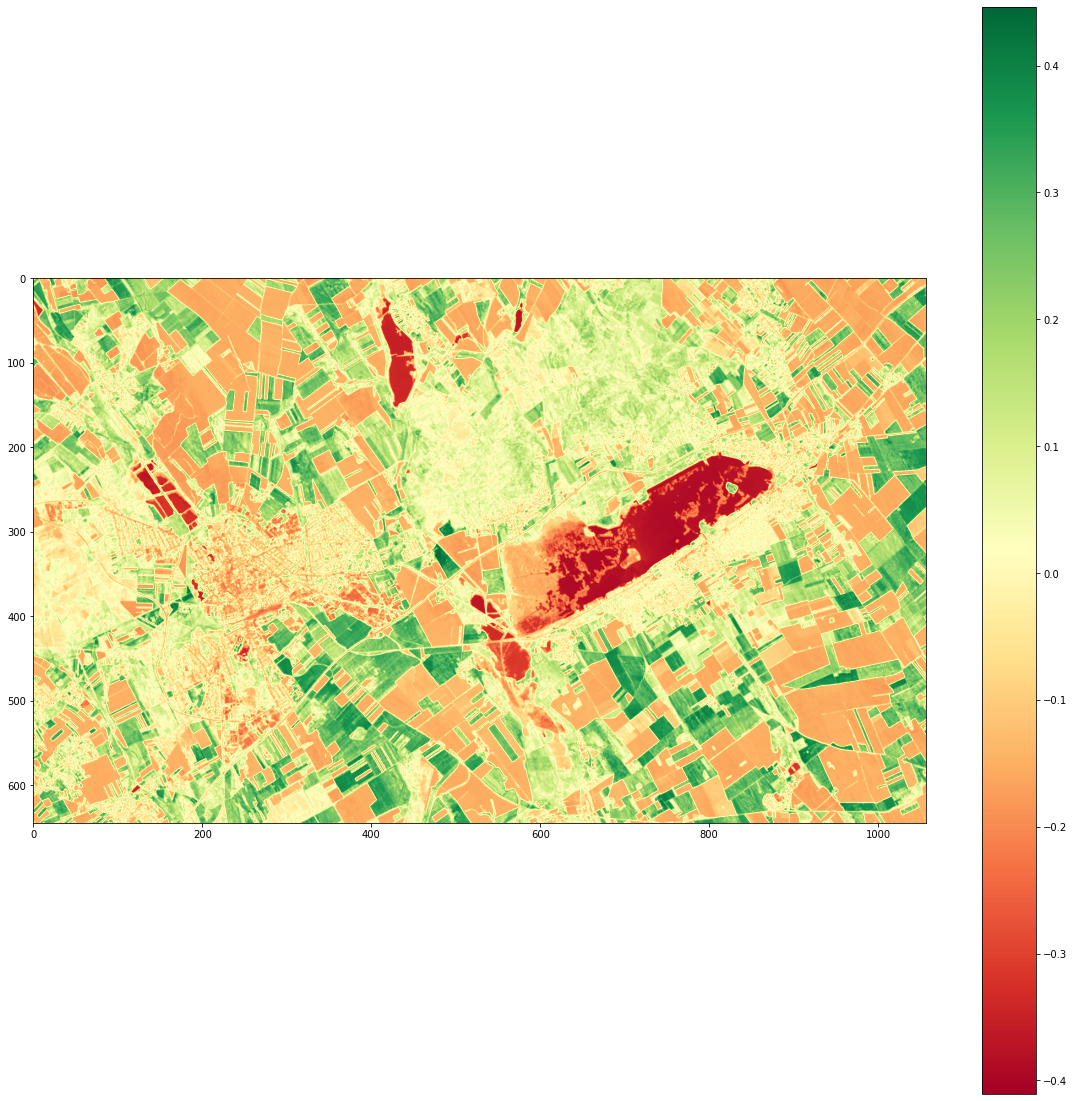

In [30]:
def calc_ndvi(nir, red):
    ndvi = (nir - red) / (nir + red)
    return ndvi

ndvi = calc_ndvi(nirf, redf)
plt.figure(figsize=[20, 20])
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.show()

The value range of an NDVI is -1 to 1. Negative values of NDVI (values approaching -1) correspond to water. Values close to zero (-0.1 to 0.1) generally correspond to barren areas of rock, sand, or snow. Low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1).

---

## Summary exercise on raster data management

### Exercise 1: NDVI change tracking

The `data/LC08_L1TP_188027_20180501_20180516_01_T1_Szekesfehervar.tif` file is a Landsat 8 satellite image from the same territory as the previous image, but acquired on 2018 May 1, so ca. 2 years earlier.

In [31]:
szfv_2018 = rasterio.open('../data/LC08_L1TP_188027_20180501_20180516_01_T1_Szekesfehervar.tif')

**Task 1:** Calculate the NDVI for the 2018 Landsat satellite image.

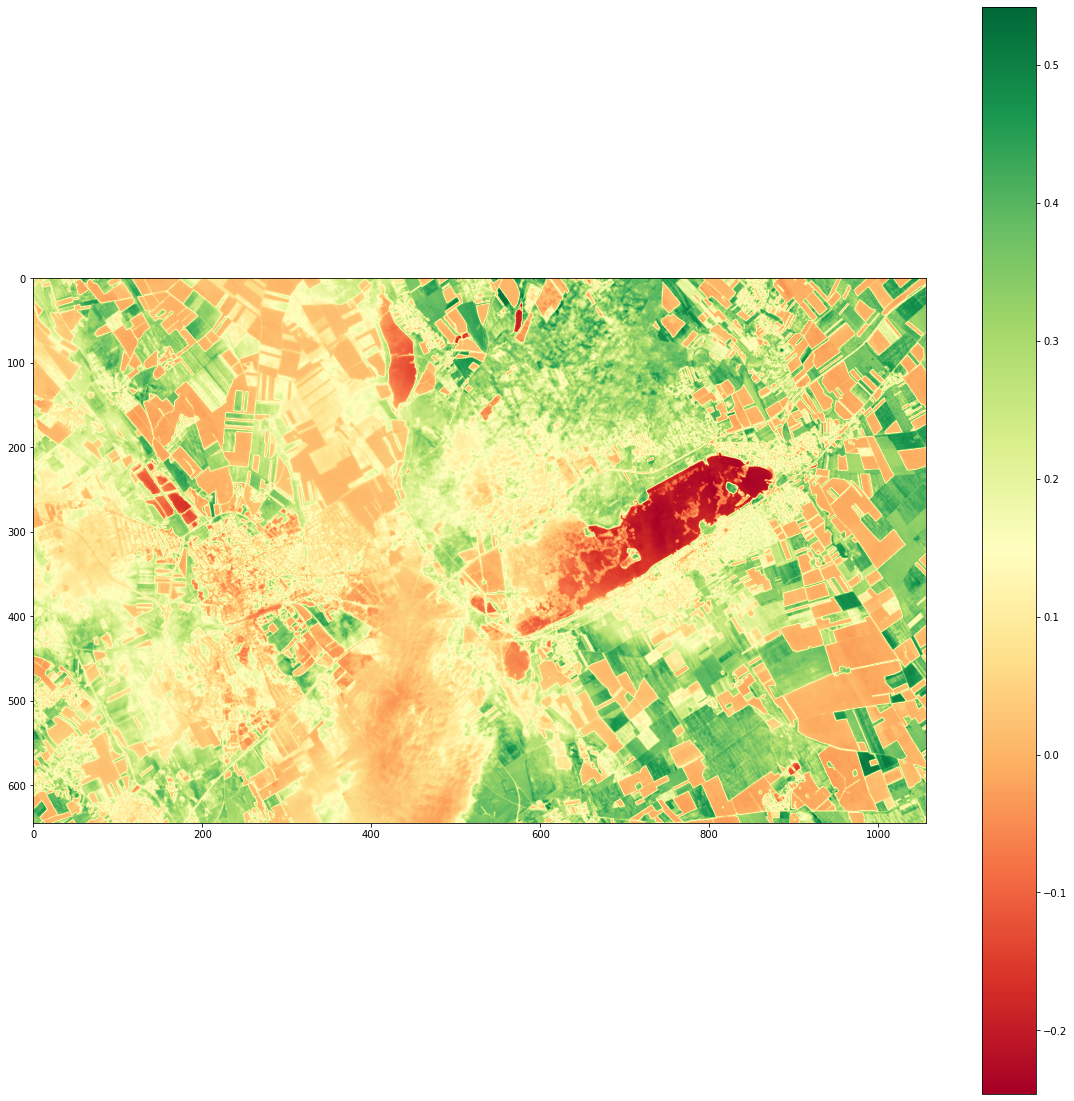

In [32]:
import numpy as np
red2 = szfv_2018.read(4)
red2_max = np.percentile(red2, 99.9)
redf2 = red2.astype('f4') / red2_max

nir2 = szfv_2018.read(5)
nir2_max = np.percentile(nir2, 99.9)
nirf2 = nir2.astype('f4') / nir2_max

ndvi2 = calc_ndvi(nirf2, redf2)
plt.figure(figsize=[20, 20])
plt.imshow(ndvi2, cmap='RdYlGn')
plt.colorbar()
plt.show()

**Task 2:** Compute the NDVI difference of the time interval and visaulize it.

Display the metadata of the 2 satellite images to compare them.

In [33]:
print(szfv_2020.meta)
print(szfv_2018.meta)


{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1057, 'height': 645, 'count': 11, 'crs': CRS.from_epsg(32634), 'transform': Affine(30.0, 0.0, 296745.0,
       0.0, -30.0, 5240535.0)}
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1057, 'height': 645, 'count': 11, 'crs': CRS.from_epsg(32634), 'transform': Affine(30.0, 0.0, 296745.0,
       0.0, -30.0, 5240535.0)}


Compute and visualize the NDVI difference:

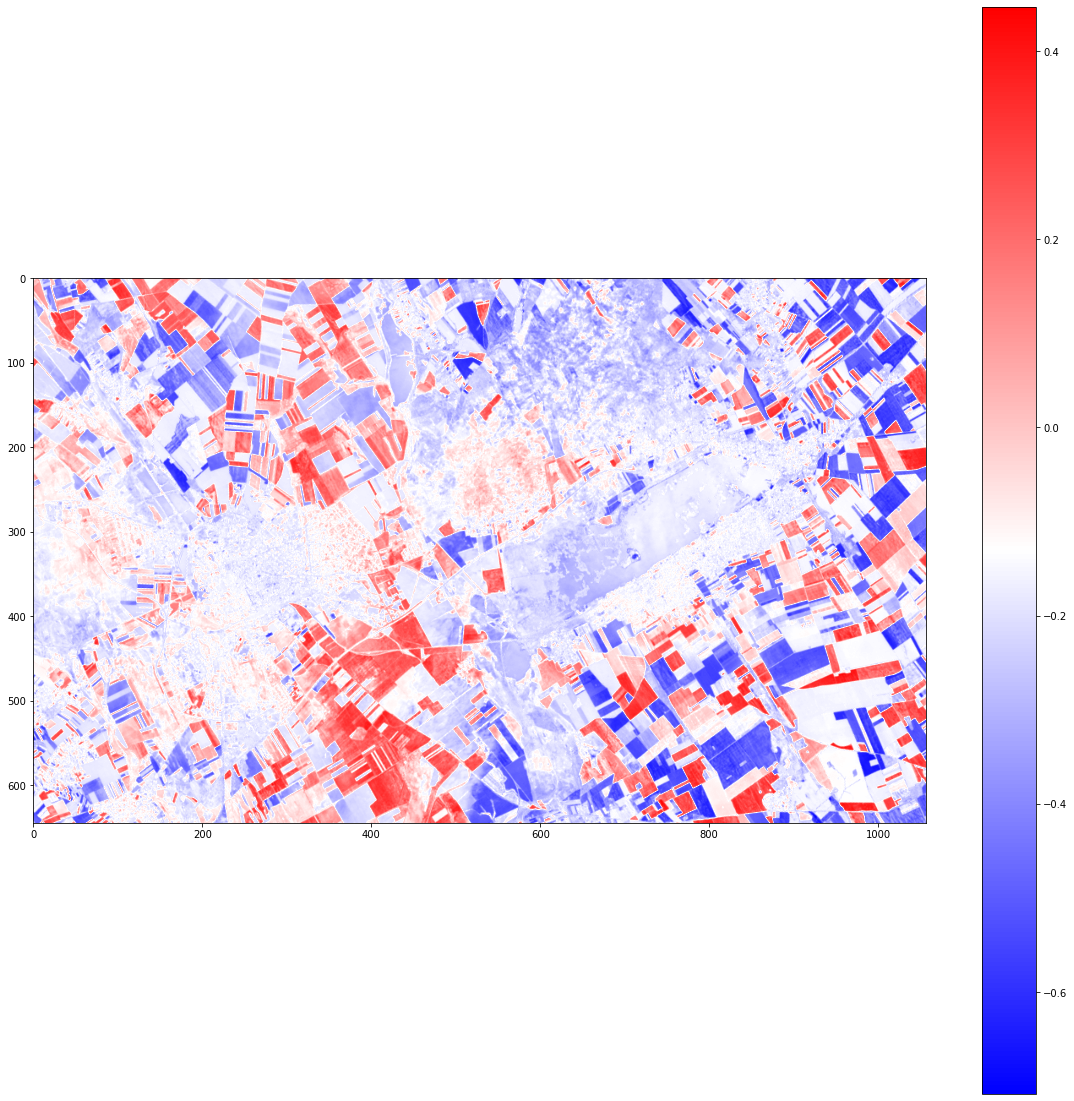

In [34]:
ndvi_diff = ndvi - ndvi2
plt.figure(figsize=[20, 20])
plt.imshow(ndvi_diff, cmap='bwr')
plt.colorbar()
plt.show()

### Exercise 2: Processing larger images

The `LC08_L1TP_188027_20200420_20200508_01_T1` file is a complete Landsat 8 satellite image tile, containing Budapest and parts of Western-Hungary, acquired on 2020 April 20.  
Download: https://gis.inf.elte.hu/files/public/landsat-budapest-2020 (1.4 GB)

**Task 1:** create and RGB visualization for the complete satellite image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


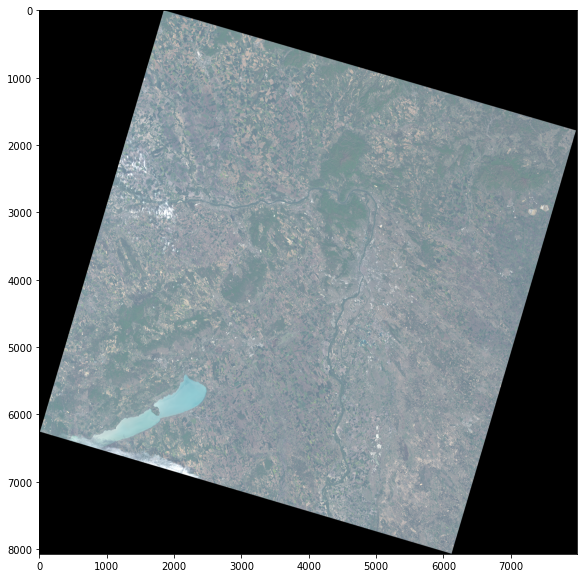

In [35]:
bp_2020 = rasterio.open('LC08_L1TP_188027_20200420_20200508_01_T1.tif')

bp_red = bp_2020.read(4)
bp_green = bp_2020.read(3)
bp_blue = bp_2020.read(2)

bp_red_max = np.percentile(bp_red, 99.9)
bp_blue_max = np.percentile(bp_blue, 99.9)
bp_green_max = np.percentile(bp_green, 99.9)

bp_redf = bp_red.astype('f4') / bp_red_max
bp_bluef = bp_blue.astype('f4') / bp_blue_max
bp_greenf = bp_green.astype('f4') / bp_green_max
bp_rgb = [bp_redf, bp_greenf, bp_bluef]

plt.figure(figsize=[10,10])
show(bp_rgb)
plt.show()

**Task 2:** calculate the NDVI for the complete satellite image.

<ipython-input-30-43374d61fc32>:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir - red) / (nir + red)


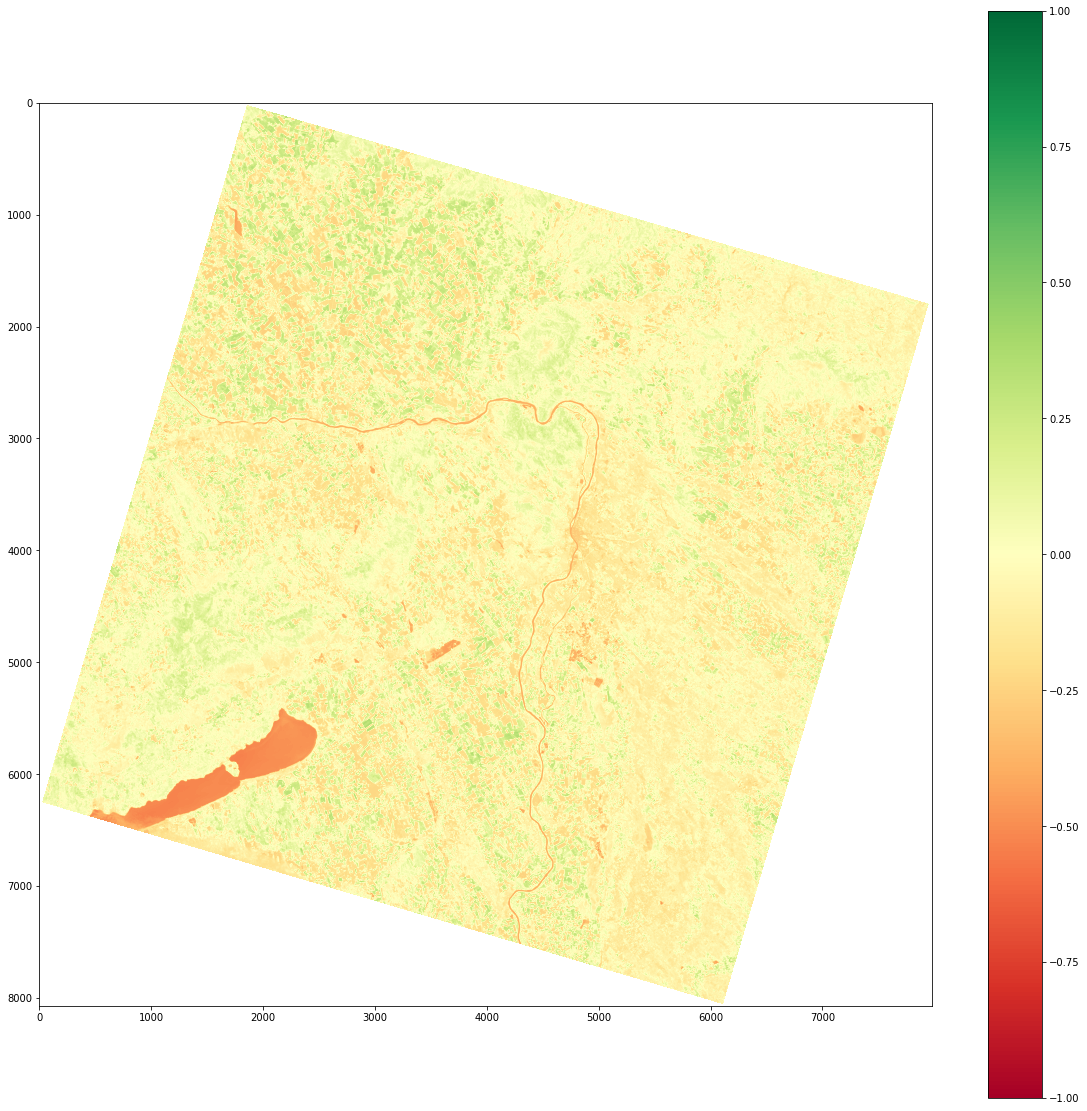

In [36]:
bp_nir = bp_2020.read(5)
bp_nir_max = np.percentile(bp_nir, 99.99)
bp_nirf = bp_nir.astype('f4') / bp_nir_max

bp_ndvi = calc_ndvi(bp_nirf, bp_redf)
plt.figure(figsize=[20, 20])
plt.imshow(bp_ndvi, cmap='RdYlGn')
plt.colorbar()
plt.show()